# Top Restaurants in HK based on Openrice

## Setting up BeautifulSoup and Selenium

In [6]:
from bs4 import BeautifulSoup
import requests

In [7]:
!pip install selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait

In [8]:
URL = "https://www.openrice.com/en/hongkong/restaurants?page="

In [9]:
URL[:24]

'https://www.openrice.com'

In [10]:
driver = webdriver.Chrome('./chromedriver')

C:\Users\Airin\AppData\Local\Temp\ipykernel_26936\2299280398.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver')


In [11]:
driver.get(URL)

In [12]:
subhtml = driver.page_source

<html class="or-web js flexbox flexboxlegacy canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" data-vue-meta="%7B%22lang%22:%7B%221%22:%22en-US%22%7D%7D" lang="en-US"><head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# website: http://ogp.me/ns/website#">
<meta charset="utf-8"/>
<title>Hong Kong Restaurant Search  | OpenRice Hong Kong</title>
<meta content="#fff" name="theme-color"/>
<meta content="width=1280" name="viewport"/>
<link href="//static5.orstatic.com" rel="dns-prefetch"/>
<link href="//static6.orstatic.com" rel="dns-prefetch"/>
<link href="//static7.orstatic.com" rel="dns-prefetc
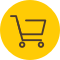
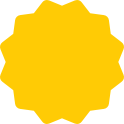
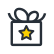
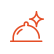
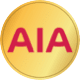
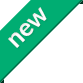
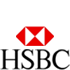
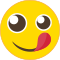
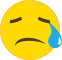
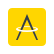
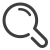
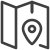
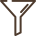
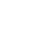
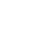
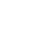

In [13]:
soup = BeautifulSoup(subhtml,"html.parser")
soup

## Main Code

In [15]:
restaurant_names = []
price_ranges = []
good_reviews = []
bad_reviews = []
full_address = []
district = []
cuisine = []
dish = []
written_reviews = []
bookmarks = []


while True:  
    # scrape each page
    
    
    for a in soup.find_all('h2'):
        restaurant_names.append(a.text[1:-1])

    for b in soup.find_all('div', class_="icon-info icon-info-food-price"):
        price_ranges.append(b.text[2:-1])

    for c in soup.find_all('span', class_="score score-big highlight"):
        good_reviews.append(c.text)
        
    for d in soup.find_all('span', class_="score highlight"):
        bad_reviews.append(d.text)
    
    for e in soup.find_all('div', class_="icon-info address"):
        full_address.append(e.text[3:-2])
        
    for f in soup.find_all('div', class_="icon-info address"):
        district.append(f.a.text)
    
    for g in soup.find_all('ul', class_="pois-categoryui-list"):
        cuisine.append(g.li.text)
    
    for h in soup.find_all('ul', class_="pois-categoryui-list"):
        try:
            dish.append(h.find_all('li')[1].text)
        except IndexError:
            dish.append("")
    
    for i in soup.find_all('div', class_="counters-container"):
        written_reviews.append(int(i.text[2:-10]))
    
    for j in soup.find_all('div', class_="text bookmarkedUserCount js-bookmark-count"):
        bookmarks.append(int(float(j.text[:-1])*1000))
        
        
        
    # going to the next page to scrape
    nextlink = (soup.find_all('a',class_= "pagination-button next js-next", href = True)[-1])

    if nextlink:
        nextlink = URL[:24] + (soup.find_all('a',class_= "pagination-button next js-next", href = True)[-1]['href'])
        driver.get(nextlink)
        subhtml = driver.page_source
        soup = BeautifulSoup(subhtml, "html.parser")        
    else:
        break

        
        

IndexError: list index out of range

## Creating the dataframe

In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [18]:
# add data from lists

df['restaurant_name'] = restaurant_names
df['price_range_per_head'] = price_ranges
df['good_ratings'] = good_reviews
df['bad_ratings'] = bad_reviews
df['full_address'] = full_address
df['district'] = district
df['cuisine'] = cuisine
df['dish'] = dish
df['written_reviews'] = written_reviews
df['bookmarks'] = bookmarks

df

,restaurant_name,price_range_per_head,good_ratings,bad_ratings,full_address,district,cuisine,dish,written_reviews,bookmarks
0,Tearapy 茶聊,$101-200,1149,45,"1/F, 189 Portland Street, Mong Kok",Mong Kok,International,Hamburger,1514,72200
1,The Captain's House,$201-400,1386,54,"18/F, H8, 8 Hau Fook Street, Tsim Sha Tsui",Tsim Sha Tsui,Western,Seafood,1625,65700
2,Outdark (厚福街),$101-200,900,22,"17/F, H8, 8 Hau Fook Street, Tsim Sha Tsui",Tsim Sha Tsui,Korean,Korean Fried Chicken,1059,61500
3,Yadllie Plate 야들리애플래이트,$101-200,1183,66,"11/F, CTMA Centre, 1 Sai Yeung Choi Street, Mo...",Mong Kok,Korean,Korean Fried Chicken,1571,117800
4,Outdark (飛達商業中心),$201-400,1175,28,"2/F, Fee Tat Commercial Centre, 613 Nathan Roa...",Mong Kok,Korean,,1370,67800
...,...,...,...,...,...,...,...,...,...,...
245,Le Viet,$101-200,715,28,"Shop L402, 4/F, The ONE, 100 Nathan Road, Tsim...",Tsim Sha Tsui,Vietnamese,Skewer,896,30600
246,Comfy by Chef's Stage (東廣場),$101-200,322,3,"Shop 25-31&59, G/F, E Plaza, 7 Shing Yip Stree...",Kwun Tong,Western,Hamburger,364,11500
247,Flagship,$201-400,332,5,"G/F, 35 Ship Street, Wan Chai",Wan Chai,Western,Steak House,358,12000
248,Tian Tian Hainanese Chicken Rice (ELEMENTS) 天天...,$101-200,407,41,"Shop 1050A, 1/F, Water Zone, ELEMENTS, 1 Austi...",Tsim Sha Tsui,Singaporean,,535,9400


In [19]:
df.dtypes

restaurant_name         object
price_range_per_head    object
good_ratings            object
bad_ratings             object
full_address            object
district                object
cuisine                 object
dish                    object
written_reviews          int64
bookmarks                int64
dtype: object

In [20]:
df['good_ratings'].astype(int)

0      1149
1      1386
2       900
3      1183
4      1175
       ... 
245     715
246     322
247     332
248     407
249     242
Name: good_ratings, Length: 250, dtype: int32

In [21]:
df['bad_ratings'].astype(int)

0      45
1      54
2      22
3      66
4      28
       ..
245    28
246     3
247     5
248    41
249    16
Name: bad_ratings, Length: 250, dtype: int32

In [22]:
df.to_csv(r'C:\Users\Airin\Desktop\Xccelerate\Project 1 - Web Scraping Openrice\openrice_raw_dataframe.csv', index=False, header=True)

## Working (Please ignore)

###  Restaurant Name

In [ ]:
# single restaurant name
soup.h2.text

In [14]:
# single restaurant name
soup.find(class_="title-name").a.text

'Tearapy 茶聊'

In [ ]:
# all restaurant names
soup.find_all('h2')[1].text

In [ ]:
# all restaurant names
soup.select(".title-name")[1].get_text()

In [ ]:
for i in soup.find_all('h2'):
    print(i.get_text())

In [ ]:
restaurant_names2 = [x[1:-2] for x in restaurant_names]

In [ ]:
restaurant_names2

### Price Range

In [ ]:
soup.find_all('div', class_="icon-info icon-info-food-price")

In [ ]:
price_ranges

In [ ]:
price_ranges2 = [x[2:-1] for x in price_ranges]

In [ ]:
price_ranges2

###  Good Reviews

In [ ]:
soup.find_all('span', class_="score score-big highlight")

In [ ]:
good_reviews

### Bad Reviews

In [ ]:
soup.find_all('span', class_="score highlight")

In [ ]:
bad_reviews

### Full Address

In [ ]:
soup.find_all('div', class_="icon-info address")[0].text[3:-2]

In [ ]:
full_address

In [ ]:
full_address2 = [x[3:-2] for x in full_address]

In [ ]:
full_address2

### District

In [ ]:
soup.find_all('div', class_="icon-info address")

In [ ]:
soup.find('div', class_="icon-info address").a.text

In [ ]:
district = []

for f in soup.find_all('div', class_="icon-info address"):
    district.append(f.a.text)

In [ ]:
district

### Cuisine

In [ ]:
soup.find_all('ul', class_="pois-categoryui-list")

In [ ]:
soup.find('ul', class_="pois-categoryui-list").li.text

In [ ]:
cuisine = []

In [ ]:
for g in soup.find_all('ul', class_="pois-categoryui-list"):
    cuisine.append(g.li.text)

In [ ]:
cuisine

### Dish

In [ ]:
soup.find('ul', class_="pois-categoryui-list").find_all('li')[1].text

In [ ]:
dish = []

In [ ]:
for h in soup.find_all('ul', class_="pois-categoryui-list"):
    try:
        dish.append(h.find_all('li')[1].text)

    except IndexError:
        dish.append("")

In [ ]:
dish

### Reviews

In [ ]:
written_reviews = []

In [ ]:
soup.find_all('div', class_="counters-container")

In [ ]:
for i in soup.find_all('div', class_="counters-container"):
    written_reviews.append(int(i.text[2:-10]))

In [ ]:
written_reviews

### Bookmarks

In [ ]:
bookmarks = []

In [ ]:
soup.find_all('div', class_="text bookmarkedUserCount js-bookmark-count")

In [ ]:
int(float(soup.find('div', class_="text bookmarkedUserCount js-bookmark-count").text[:-1])*1000)

In [ ]:
for j in soup.find_all('div', class_="text bookmarkedUserCount js-bookmark-count"):
    bookmarks.append(int(float(j.text[:-1])*1000))

In [ ]:
bookmarks